In [1]:
import matplotlib.pyplot as plt
from plot_sigma_dust import get_time, return_sigma_dust
datadir = "output/dust_diffusion/"

In [2]:
import h5py
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

def load_dset(filename, dset, N=None):
    with h5py.File(filename, "r") as f:
        if N is not None:
            data = f[dset][N,:]
        else:
            data = f[dset][:]
        try:
            unit = f[dset].attrs["unit"]
            data = data*u.Unit(unit)
        except KeyError:
            pass
    return data

In [3]:
times = load_dset("disklab.hdf5", "time").to_value("yr")
rs = load_dset("disklab.hdf5", "r").to_value("au")

5031.041641313204
5031.041641313204
5031.041641313204
5031.041641313204
5031.041641313204


Text(0, 0.5, '$\\Sigma_d$ normalized to Mdust = 1')

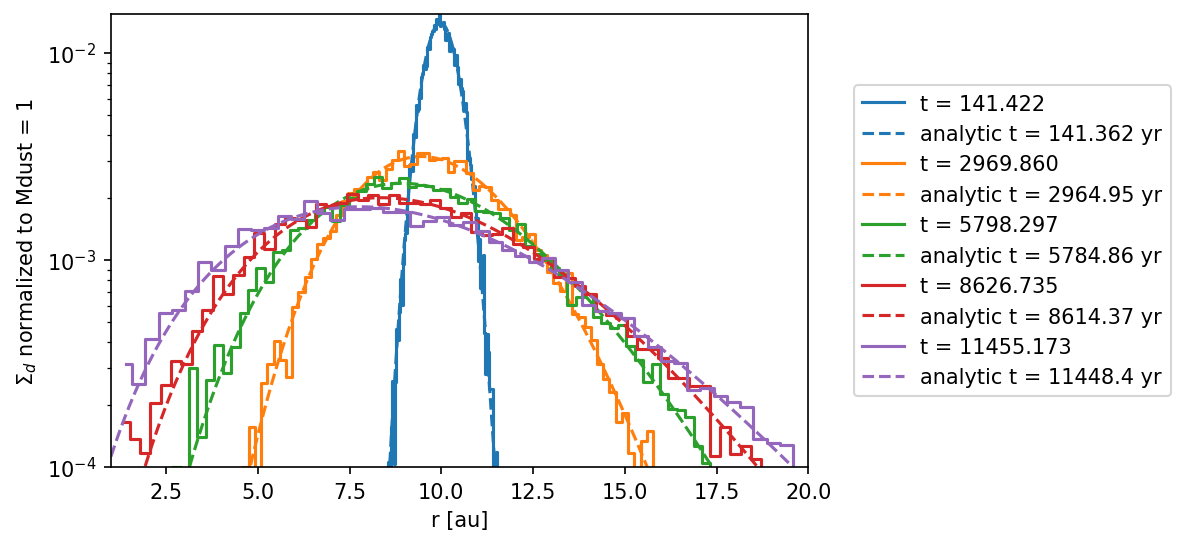

In [9]:
fig, ax = plt.subplots(dpi=150)

toffset = 0

inds = range(1,100,20)
# inds = [1,5,10,12]
Ymax = 0
for n in inds:
    try:
        t = get_time(datadir, n)
        sigma_dust, rmid, dr = return_sigma_dust(datadir, n, nbins=101)
        factor = np.sum(sigma_dust*rmid*dr*2*np.pi)
        Y = sigma_dust/factor
        line = ax.plot(rmid, Y, drawstyle="steps-mid", label=f"t = {t:.3f}")
        # print(np.sum(rmid*dr*2*np.pi))
        # print("r", rmid)
        # print("dr", dr)
        
        Ymax = max(Ymax, np.max(Y))
        
        n_ana = np.argmin(np.abs(times-t))
        sigmad = load_dset("disklab.hdf5", "sigmad", N=n_ana)
        line = ax.get_lines()[-1]
        dr = np.pad(rs[1:]-rs[:-1], (0,1), mode="edge")
        print(np.sum(rs*dr*2*np.pi))
        factor = np.sum(sigmad*rs*dr*2*np.pi)
        Y = sigmad/factor
        # print("r", rs)
        # print("len(r)", len(rs))
        # print("dr", dr)
        ax.plot(rs, Y, color=line.get_color(), ls="--", label=f"analytic t = {times[n_ana]:3g} yr")
        Ymax = max(Ymax, np.max(Y))
    except (FileNotFoundError, IndexError):
        pass
    
ax.set_yscale("log")
ax.set_ylim(bottom=1e-4, top=Ymax)
ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
ax.set_xlim(1, 20)

ax.set_xlabel("r [au]")
ax.set_ylabel(r"$\Sigma_d$ normalized to Mdust = 1")

In [5]:
(1.4662945565992453E14*u.cm).to("au")

<Quantity 9.80157371 AU>